РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

Факультет физико-математических и естественных наук

Кафедра математического моделирования и искусственного интеллекта

# ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1
Дисциплина: Методы машинного обучения



студент: Чичкина Ольга Константиновна

Группа: НПИбд-01-21

Москва 2024


# Вариант 17


Контрольная работа 1 – Вариант 17

1. Набор данных: wine_quality

2. Независимая переменная: features/density

3. Зависимая переменная: features/total sulfur dioxide

4. Визуализация для независимой переменной – эмпирическая плотность распределения

5. Визуализация для зависимой переменной – столбчатая диаграмма

6. Показатель качества регрессии – MSE (mean squared error)

# 1


Загрузка и предварительный анализ данных

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow import keras



# Загрузка набора данных
ds = tfds.load('wine_quality', split='train')



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/4898 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteL6GTEQ/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


In [ ]:
df = tfds.as_dataframe(ds)

In [ ]:
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.corr()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718,0.435575
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512,-0.209934
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472,-0.009209
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114,-0.307123
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697,-0.113663
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012,0.008158
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915,0.099427
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286,-0.097577
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728,0.053678
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261,-0.174737


In [ ]:
corr_matrix = df.corr()
corr_matrix.apply('abs')

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,0.360189,0.075729,0.780138,0.120881,0.250104,0.121432,0.450631,0.017433,0.448892,0.067718,0.435575
features/chlorides,0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,0.090439,0.088685,0.016763,0.198910,0.070512,0.209934
features/citric acid,0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,0.163748,0.094212,0.062331,0.121131,0.149472,0.009209
features/density,0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,0.093592,0.838967,0.074493,0.529881,0.027114,0.307123
features/fixed acidity,0.120881,0.023086,0.289181,0.265331,1.000000,0.049396,0.425858,0.089021,0.017143,0.091070,0.022697,0.113663
features/free sulfur dioxide,0.250104,0.101392,0.094077,0.294210,0.049396,1.000000,0.000618,0.299098,0.059217,0.615501,0.097012,0.008158
features/pH,0.121432,0.090439,0.163748,0.093592,0.425858,0.000618,1.000000,0.194133,0.155951,0.002321,0.031915,0.099427
features/residual sugar,0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,0.194133,1.000000,0.026664,0.401439,0.064286,0.097577
features/sulphates,0.017433,0.016763,0.062331,0.074493,0.017143,0.059217,0.155951,0.026664,1.000000,0.134562,0.035728,0.053678
features/total sulfur dioxide,0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261,0.174737


пары признаков с наиболее низкой и наиболее высокой корреляцией.


In [ ]:
min_corr = corr_matrix.apply('abs').idxmin(axis = 1)
min_df = pd.concat([min_corr, corr_matrix.apply('abs').min()], axis=1)
min_df.columns = ['Пары с минимальной корреляцией', '3начение']
min_df



,Пары с минимальной корреляцией,3начение
features/alcohol,features/sulphates,0.017433
features/chlorides,features/sulphates,0.016763
features/citric acid,quality,0.009209
features/density,features/volatile acidity,0.027114
features/fixed acidity,features/sulphates,0.017143
features/free sulfur dioxide,features/pH,0.000618
features/pH,features/free sulfur dioxide,0.000618
features/residual sugar,features/sulphates,0.026664
features/sulphates,features/chlorides,0.016763
features/total sulfur dioxide,features/pH,0.002321


In [ ]:
max_corr = corr_matrix.apply('abs').replace({1:0}).idxmax(axis = 1)
max_df = pd.concat([max_corr, corr_matrix.apply('abs').replace({1:0}).max()], axis=1)
max_df.columns = ['Пары с максимальной корреляцией', '3начение']
max_df

,Пары с максимальной корреляцией,3начение
features/alcohol,features/density,0.780138
features/chlorides,features/alcohol,0.360189
features/citric acid,features/fixed acidity,0.289181
features/density,features/residual sugar,0.838967
features/fixed acidity,features/pH,0.425858
features/free sulfur dioxide,features/total sulfur dioxide,0.615501
features/pH,features/fixed acidity,0.425858
features/residual sugar,features/density,0.838967
features/sulphates,features/pH,0.155951
features/total sulfur dioxide,features/free sulfur dioxide,0.615501


# 2


визуализация независимой переменной

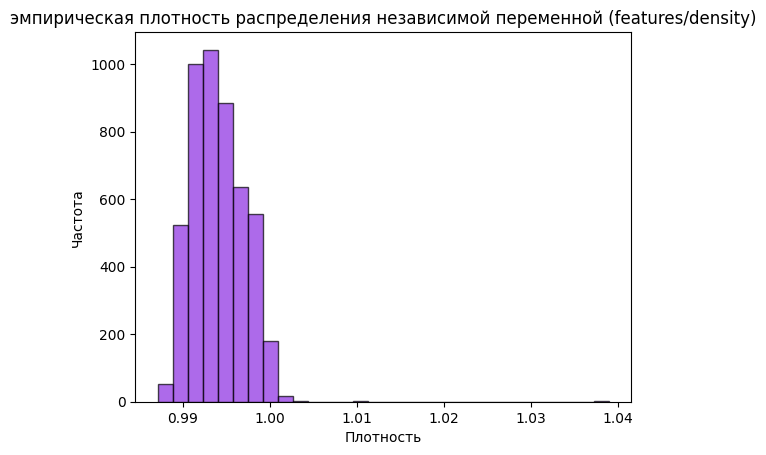

In [ ]:
plt.subplot(1, 1, 1)
df['features/density'].plot(kind='hist', bins=30, color='blueviolet', edgecolor='black', alpha= 0.7)
plt.title('эмпирическая плотность распределения независимой переменной (features/density)')
plt.xlabel('Плотность')
plt.ylabel('Частота')
plt.show()


визуализация зависимой переменной

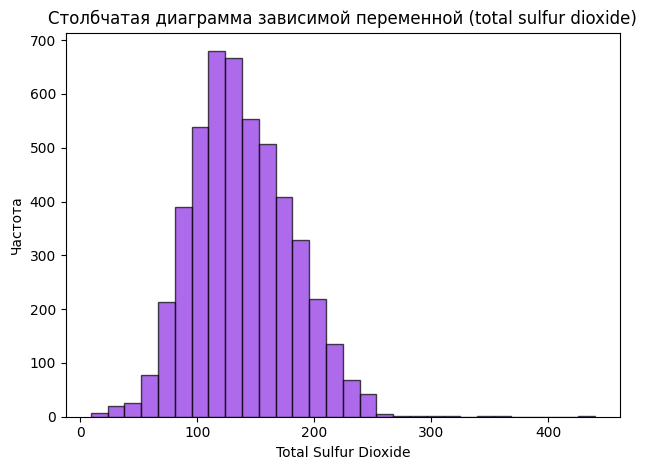

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(df['features/total sulfur dioxide'], bins=30, color='blueviolet', edgecolor='black', alpha=0.7)
plt.title('Столбчатая диаграмма зависимой переменной (total sulfur dioxide)')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# 3

диаграмма рассеяния

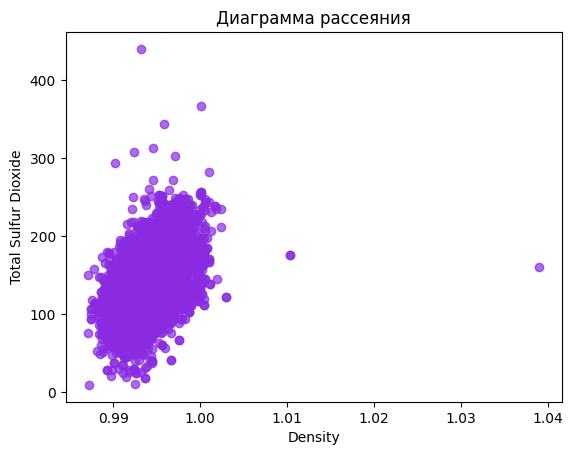

In [ ]:
# Построение диаграммы рассеяния

plt.scatter(x=df['features/density'], y=df['features/total sulfur dioxide'], color='blueviolet', alpha= 0.7)
plt.title('Диаграмма рассеяния')
plt.xlabel('Density')
plt.ylabel('Total Sulfur Dioxide')
plt.show()



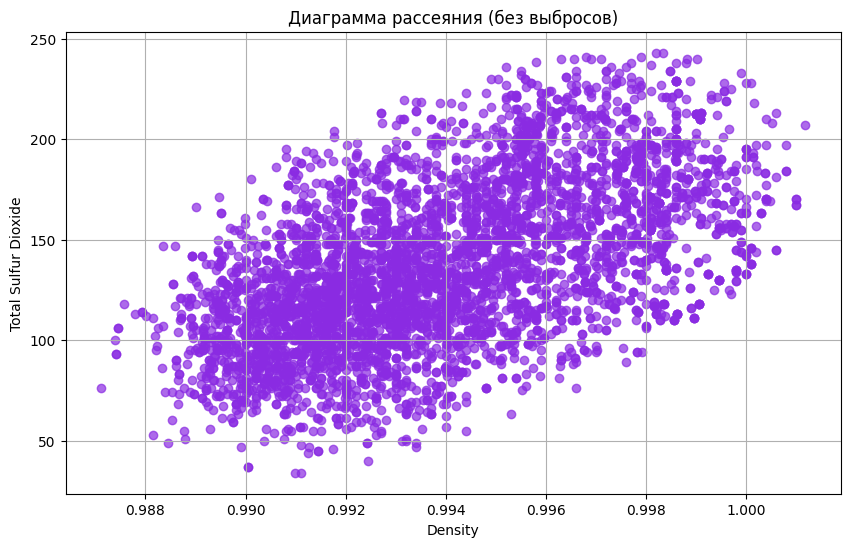

In [ ]:
from scipy.spatial.distance import mahalanobis
clear = df.drop(df[((df['features/density']<6.5) & (df['features/total sulfur dioxide']<=3))|(df['features/density']>=6.9) & (df['features/total sulfur dioxide']<=3.2)].index)
clear.dropna(inplace=True)

# Вычисление средних значений
mean_features = np.mean(df['features/density'])
mean_target = np.mean(df['features/total sulfur dioxide'])

# Вычисление ковариационной матрицы
cov_matrix = np.cov(np.vstack((df['features/density'], df['features/total sulfur dioxide'])), rowvar=True)

# Вычисление квадратов расстояний Махаланобиса
distances = [mahalanobis([f, t], [mean_features, mean_target], np.linalg.inv(cov_matrix)) for f, t in zip(df['features/density'], df['features/total sulfur dioxide'])]

# Определение выбросов (исключение точек, расположенных дальше определенного порога)
threshold = 2.5  # Вы можете настроить этот порог по вашему усмотрению
outliers_indices = np.array(distances) < threshold

# Фильтрация данных
filtered_features = df['features/density'][outliers_indices]
filtered_target = df['features/total sulfur dioxide'][outliers_indices]

# Построение обновленной диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(filtered_features, filtered_target, color='blueviolet', alpha=0.7)
plt.title('Диаграмма рассеяния (без выбросов)')
plt.xlabel('Density')
plt.ylabel('Total Sulfur Dioxide')
plt.grid(True)
plt.show()


# 4

Построение парной линейной регрессии

In [ ]:
# Преобразование данных для обучения модели
X_train = filtered_features.values.reshape(-1, 1)
y_train = filtered_target.values

# Создание и обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_train)

# Предсказание на тестовых данных
y_pred_linear = linear_model.predict(X_train)

# Вычисление R^2
r2_linear = r2_score(y_train, y_pred_linear)
print(f"R^2 для парной линейной регрессии: {r2_linear}")


R^2 для парной линейной регрессии: 0.3185569160877727


Нейронная сеть с одним нейроном

In [ ]:
# Создание нейронной сети
nn = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])

# Компиляция нейронной сети
nn.compile(optimizer='adam', loss='mean_squared_error')

# Обучение нейронной сети
nn.fit(x=filtered_features.values.reshape(-1, 1), y=filtered_target.values, epochs=100)

# Предсказание с помощью нейронной сети
nn_pred = nn.predict(filtered_features.values.reshape(-1, 1))


Epoch 1/100
150/150 [==============================] - 2s 3ms/step - loss: 20728.4980
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 20645.9219
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 20563.5645
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 20481.5820
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 20399.7871
Epoch 6/100
150/150 [==============================] - 1s 5ms/step - loss: 20318.2324
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 20236.9062
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 20155.8945
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 20075.1699
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 19994.5449
Epoch 11/100
150/150 [==============================] - 0s 2ms/step - loss: 19914.1387
Epoch 12/100
150/150 [==============================

In [ ]:
nn_r2 = r2_score(filtered_target, nn_pred)
print(f"R^2 для нейронной сети: {nn_r2}")

R^2 для нейронной сети: -7.560059431930867


сравнение результатов

In [ ]:
if r2_linear > nn_r2:
    print("Линейная регрессия дала лучший результат.")
elif r2_linear < nn_r2:
    print("Нейронная сеть дала лучший результат.")
else:
    print("Обе модели показали одинаковый результат.")

Линейная регрессия дала лучший результат.


# 5


Построение диаграммы рассеяния и линий регрессии

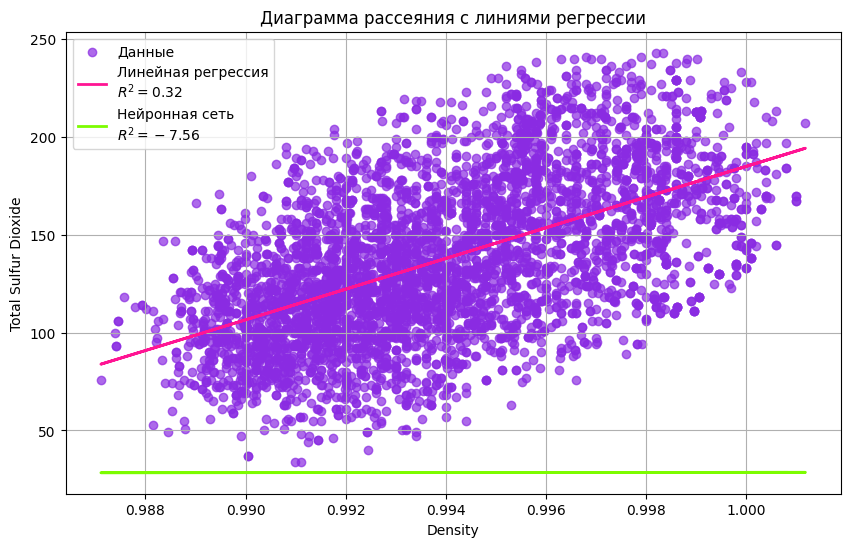

In [ ]:
# Построение диаграммы рассеяния и линий регрессии
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния
plt.scatter(filtered_features, filtered_target, color='blueviolet', alpha=0.7, label='Данные')

# Линия линейной регрессии
plt.plot(filtered_features, linear_pred, color='deeppink', linewidth=2, label=f'Линейная регрессия\n$R^2 = {r2_linear:.2f}$')

# Линия нейронной сети
plt.plot(filtered_features, nn_pred, color='lawngreen', linewidth=2, label=f'Нейронная сеть\n$R^2 = {nn_r2:.2f}$')

# Подписи осей и заголовок
plt.title('Диаграмма рассеяния с линиями регрессии')
plt.xlabel('Density')
plt.ylabel('Total Sulfur Dioxide')
plt.grid(True)
plt.legend()

# Отображение графика
plt.show()


# 6



разбиения набора данных на обучающую и контрольную выборки



In [ ]:
# Разбиение данных на обучающую и контрольную выборки
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Создание и адаптация нормализующего слоя для признаков
scaler = StandardScaler()
scaler.fit(X_train.values.reshape(-1, 1))

# Нормализация признаков
X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1)).flatten()
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1)).flatten()

# Нормализация зависимого признака
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# 7

In [ ]:
# Линейная регрессия
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled.reshape(-1, 1), y_train_scaled)

# Гребневая регрессия (Ridge)
ridge_regressor = Ridge(alpha=1.0)  # alpha - параметр регуляризации
ridge_regressor.fit(X_train_scaled.reshape(-1, 1), y_train_scaled)

# Лассо регрессия (Lasso)
lasso_regressor = Lasso(alpha=1.0)  # alpha - параметр регуляризации
lasso_regressor.fit(X_train_scaled.reshape(-1, 1), y_train_scaled)

Lasso()

In [ ]:


# Создание нейронной сети с гребневой регуляризацией (L2)
ridge_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,), kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

# Компиляция модели
ridge_model.compile(optimizer='adam', loss='mse')

# Обучение модели
ridge_history = ridge_model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled), verbose=0)





In [ ]:
# Создание нейронной сети с лассо регуляризацией (L1)
lasso_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,), kernel_regularizer=l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1)
])

# Компиляция модели
lasso_model.compile(optimizer='adam', loss='mse')

# Обучение модели
lasso_history = lasso_model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled), verbose=0)


In [ ]:
# Предсказание на валидационной выборке
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

30/30 [==============================] - 0s 2ms/step


In [ ]:
# Вычисление MSE для обеих моделей
ridge_mse = mean_squared_error(y_test_scaled, ridge_pred)
lasso_mse = mean_squared_error(y_test_scaled, lasso_pred)

print(f"Ridge MSE on test set: {ridge_mse}")
print(f"Lasso MSE on test set: {lasso_mse}")

Ridge MSE on test set: 0.695260763168335
Lasso MSE on test set: 0.691796600818634


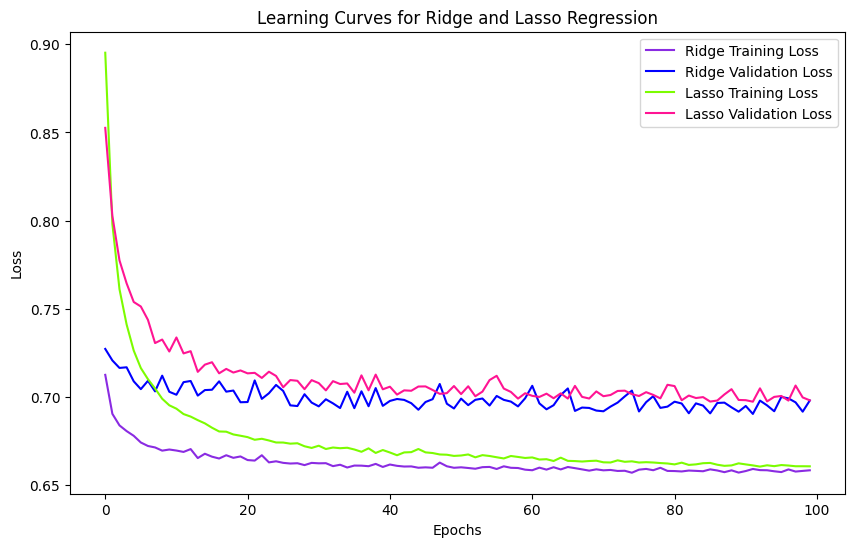

In [ ]:
# Визуализация кривых обучения для гребневой и лассо регрессии
plt.figure(figsize=(10, 6))
plt.plot(ridge_history.history['loss'], color='blueviolet', label='Ridge Training Loss')
plt.plot(ridge_history.history['val_loss'], color='blue', label='Ridge Validation Loss')
plt.plot(lasso_history.history['loss'], color='lawngreen', label='Lasso Training Loss')
plt.plot(lasso_history.history['val_loss'], color='deeppink', label='Lasso Validation Loss')
plt.title("Learning Curves for Ridge and Lasso Regression")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Создание DataFrame из данных
df = pd.DataFrame(ds)

# Извлечение всех признаков, кроме 'density' и 'total sulfur dioxide'
all_features = [k for k in df['features'][0].keys() if k not in ['density', 'total sulfur dioxide']]

# Вычисление медианных значений для признаков
features_data = df['features'].apply(lambda x: [x[feature] for feature in all_features])
features_df = pd.DataFrame(features_data.tolist(), columns=all_features)

median_values = features_df.median()

print("Медианные значения признаков:")
print(median_values)

Медианные значения признаков:
alcohol                 10.4
chlorides              0.043
citric acid             0.32
fixed acidity            6.8
free sulfur dioxide     34.0
pH                      3.18
residual sugar           5.2
sulphates               0.47
volatile acidity        0.26
dtype: object


In [ ]:
# Сортировка тестовых данных
sorted_indices = np.argsort(X_test_scaled, axis=0)
X_test_sorted = X_test_scaled[sorted_indices].reshape(-1)
y_test_sorted = y_test_scaled[sorted_indices].reshape(-1)
ridge_pred_sorted = ridge_pred[sorted_indices].reshape(-1)
lasso_pred_sorted = lasso_pred[sorted_indices].reshape(-1)



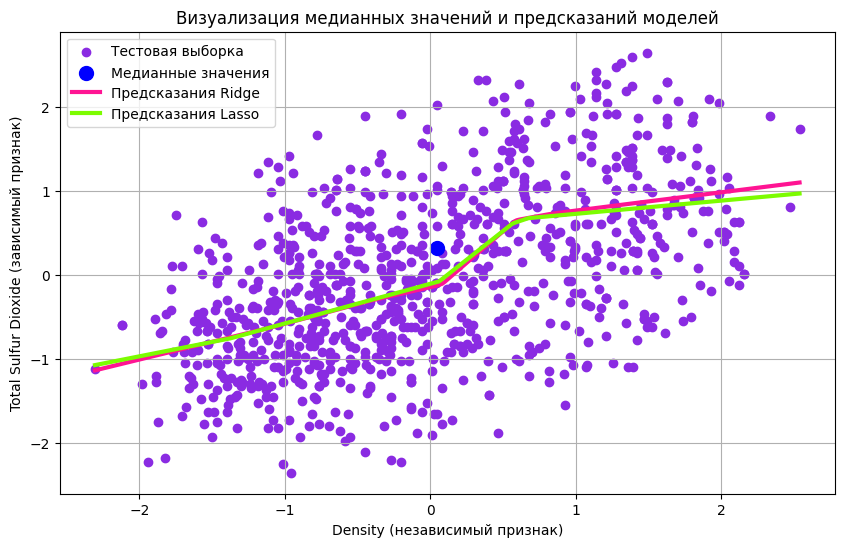

In [ ]:
# Создание графика
plt.figure(figsize=(10, 6))

# Визуализация точек тестовой выборки
plt.scatter(X_test_sorted, y_test_sorted, color='blueviolet', label='Тестовая выборка')

# Визуализация медианных значений
plt.scatter(median_values[1], median_values[2], color='blue', label='Медианные значения', s=100)

# Визуализация предсказаний моделей линиями
plt.plot(X_test_sorted, ridge_pred_sorted, linewidth=3, color='deeppink', label='Предсказания Ridge')
plt.plot(X_test_sorted, lasso_pred_sorted, linewidth=3, color='lawngreen', label='Предсказания Lasso')

# Подписи осей и заголовок
plt.xlabel('Density (независимый признак)')
plt.ylabel('Total Sulfur Dioxide (зависимый признак)')
plt.title('Визуализация медианных значений и предсказаний моделей')

# Создание легенды
plt.legend()

# Отображение графика
plt.grid(True)
plt.show()